In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,g,a,b,c,ia,ib,ic,va,vb,vc
0,0,0,0,0,71.242224,100.065889,-171.308113,199.421862,-1062.488630,863.066768
1,0,0,0,0,60.505211,108.906727,-169.411937,266.839655,-1087.302630,820.462975
2,0,0,0,0,49.848150,117.685187,-167.533337,338.414183,-1103.996850,765.582667
3,0,0,0,0,39.080639,125.969596,-165.050236,408.858993,-1115.736833,706.877840
4,0,0,0,0,28.049887,133.715420,-161.765308,476.307177,-1123.089509,646.782332


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g       24001 non-null  int64  
 1   a       24001 non-null  int64  
 2   b       24001 non-null  int64  
 3   c       24001 non-null  int64  
 4   ia      24001 non-null  float64
 5   ib      24001 non-null  float64
 6   ic      24001 non-null  float64
 7   va      24001 non-null  float64
 8   vb      24001 non-null  float64
 9   vc      24001 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.8 MB


In [5]:
df.duplicated().sum()

np.int64(1901)

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df.describe()

,g,a,b,c,ia,ib,ic,va,vb,vc
count,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000
mean,0.195475,0.325792,0.260633,0.130317,-1.912582,1.053719,0.440192,-0.019225,-0.396880,0.415135
std,0.396575,0.468681,0.438990,0.336659,205.212950,174.738972,150.143853,709.496525,705.690367,750.375193
min,0.000000,0.000000,0.000000,0.000000,-587.877572,-415.603957,-396.718314,-3847.274634,-4675.584784,-1167.125341
25%,0.000000,0.000000,0.000000,0.000000,-144.782541,-131.890148,-124.277755,-596.147415,-544.031116,-671.165165
50%,0.000000,0.000000,0.000000,0.000000,-5.089126,0.835470,1.777837,11.840359,-15.592832,-12.509308
75%,0.000000,1.000000,1.000000,0.000000,144.597307,131.887291,124.273088,596.141143,544.550643,671.166771
max,1.000000,1.000000,1.000000,1.000000,530.428177,448.998205,444.708999,1141.018121,1145.026855,8522.859418


In [10]:
features = ['ia', 'ib', 'ic', 'va', 'vb', 'vc']
target = ['g', 'a', 'b', 'c'] 

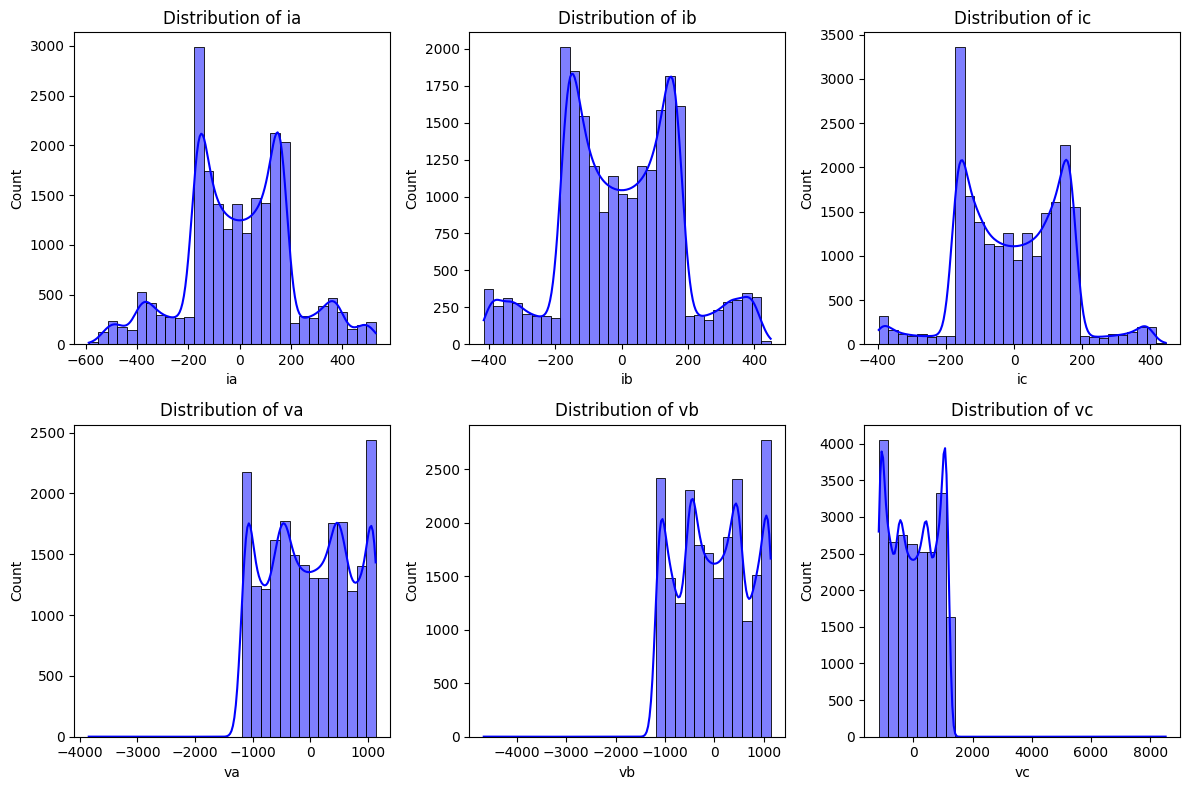

In [12]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [13]:
X = df[features]
Y = df[target]

In [14]:
df['combined_target'] = df[target].astype(str).agg('-'.join, axis=1)
Y_combined = df['combined_target']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_combined, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [17]:
predictions = model.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
class_report = classification_report(Y_test, predictions)

In [19]:
print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.890950226244344

Confusion Matrix:
 [[2997    1    0    3    1    4]
 [   0  267    0    0    0    0]
 [   0    0   37    0    0  258]
 [   2    0    0  294    0    0]
 [   2    0    0    0  302    1]
 [   0    0  210    0    0   41]]

Classification Report:
               precision    recall  f1-score   support

     0-0-0-0       1.00      1.00      1.00      3006
     0-1-1-0       1.00      1.00      1.00       267
     0-1-1-1       0.15      0.13      0.14       295
     1-1-0-0       0.99      0.99      0.99       296
     1-1-1-0       1.00      0.99      0.99       305
     1-1-1-1       0.13      0.16      0.15       251

    accuracy                           0.89      4420
   macro avg       0.71      0.71      0.71      4420
weighted avg       0.89      0.89      0.89      4420



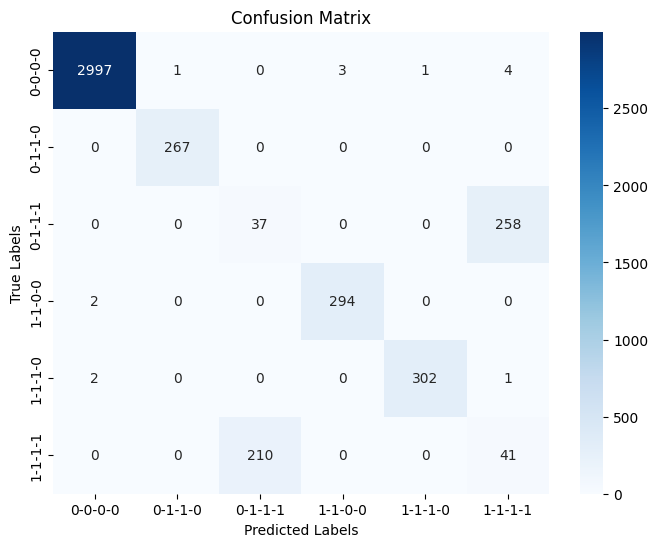

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [21]:
import joblib

joblib.dump(model, 'model.pkl')
print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'


In [25]:
loaded_model = joblib.load('model.pkl')

In [24]:
import numpy as np

In [26]:
new_features = np.array([50, 120, -160, 300, -1100, 800])
feature_names = ['ia', 'ib', 'ic', 'va', 'vb', 'vc']
new_features = pd.DataFrame(new_features, columns=feature_names)

ValueError: Shape of passed values is (6, 1), indices imply (6, 6)

In [47]:
predicted_output = loaded_model.predict(new_features)
print(predicted_output)

['0-0-0-0' '0-0-0-0']


In [38]:
print("Ho gya")

Ho gya
